In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_around_onset_combined_catch_FIGURES'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
#load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [7]:
sessions = ['catch']

all_labels='rwVSsh','rwVScsm','shVScsm','rwndVSshnd','rwVSrwnd','rwndVScsm','shVSshnd','shndVScsm'
non_catch_labels = 'rwVSsh','rwVScsm','shVScsm'
catch_labels = 'rwndVSshnd','rwVSrwnd','rwndVScsm','shVSshnd','shndVScsm'

In [16]:
v_name=[]
for t in range(14):
    for r in 'dhpc','vhpc':
        exec("scores_tb_%s_equal_trials_%s = {}"%(t,r))
        for label in all_labels:
            exec("v_name = 'scores_tb_%s_equal_trials'"%(t))
            exec("path='../notebooks/autorestore/decoding_around_onset_combined_1sec_%s_catch/'"%(r))
            exec("scores_tb_%s_equal_trials_%s_t = ut.load_variable(v_name,path)"%(t,r))
            exec("scores_tb_%s_equal_trials_%s_t = scores_tb_%s_equal_trials_%s_t[label]"%(t,r,t,r))
            exec("scores_tb_%s_equal_trials_%s[label] = scores_tb_%s_equal_trials_%s_t"%(t,r,t,r))

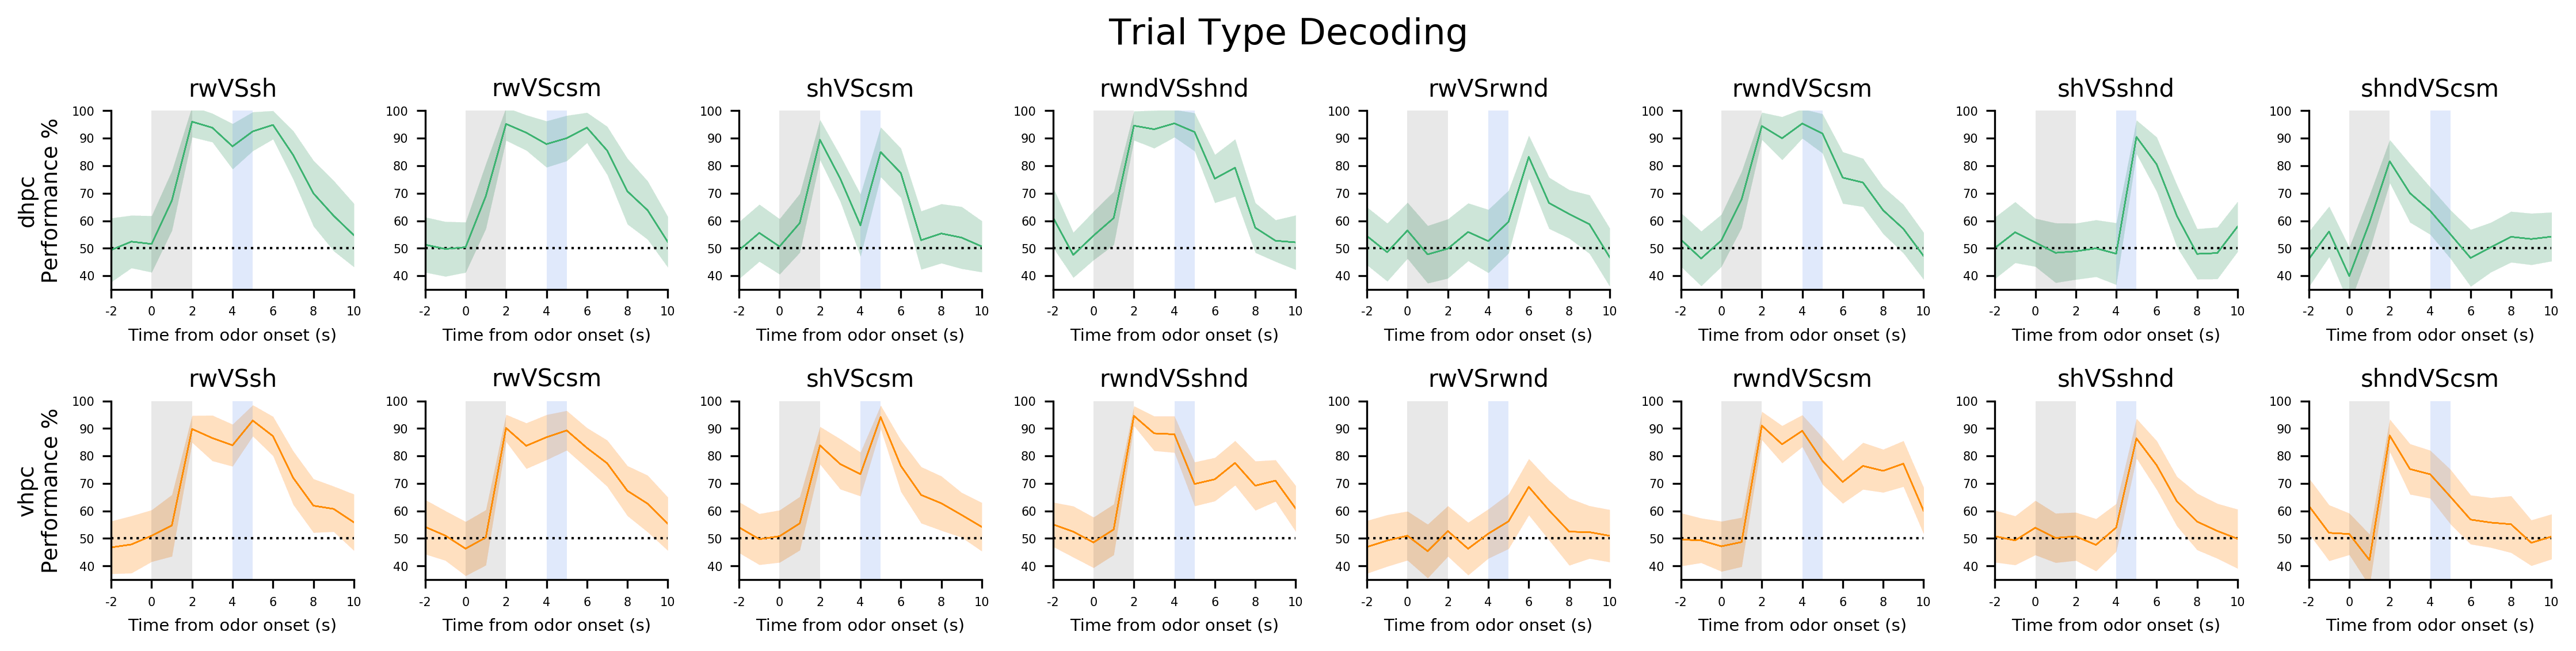

In [46]:
fig, ax = pl.subplots(2,len(all_labels), figsize=(15, 3.5))

for label,col in zip(all_labels,range(len(all_labels))):
    for r, reg,co in zip(range(2),['dhpc','vhpc'],['mediumseagreen','darkorange']):
        for t in range(13):
            ax[r][col].plot([(t-2) for t in range(13)],[(np.mean(eval("scores_tb_%s_equal_trials_%s[label]"%(t,reg)))*100) for t in range(13)],
                            color=co, ls='-',lw=.5 ,ms=1)
            m = np.array([(np.mean(eval("scores_tb_%s_equal_trials_%s[label]"%(t,reg)))*100) for t in range (13)])
            s = np.array([(np.std(eval("scores_tb_%s_equal_trials_%s[label]"%(t,reg)))*100) for t in range (13)])
            ax[r][col].fill_between([(t-2) for t in range(13)],m-s,m+s,alpha=0.02,color=co,linewidth=0)
            ax[r][col].set_title(all_labels[col],fontsize=10)
for x in range (len(all_labels)):
    for r,reg in zip(range(2),['dhpc','vhpc']):
        ax[r][x].set_ylim(35, 100)
        ax[r][x].set_xlim(-2, 10)
        ax[r][x].set_xticks(np.arange(-2,11, 2))
        ax[r][x].set_xticklabels(np.arange(-2,11, 2))
        ax[r][x].hlines(50,-2,10, color='k', lw=1, linestyles='dotted')
        ax[r][x].set_xlabel('Time from odor onset (s)')
        ax[r][0].set_ylabel(reg+'\nPerformance %',fontsize=9)
        pt.plot_period_bar(ax[r][x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[r][x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
pl.suptitle("Trial Type Decoding", y=1.06,fontsize=15)
fig.tight_layout(pad=2)


fig.savefig('../figures/%s_horizontal_dv.pdf'%NOTEBOOK_NAME)

In [48]:
labels_to_plot = [1,5,4,2,7,6]
labels_to_label = ['rw VS CS-','rw catch VS CS-','rw catch VS rw','sh VS CS-','sh catch VS CS-','sh catch vs sh']

trials = 45 sh, 45 rw, 15 sh catch, 15 rw catch, 20 CS-


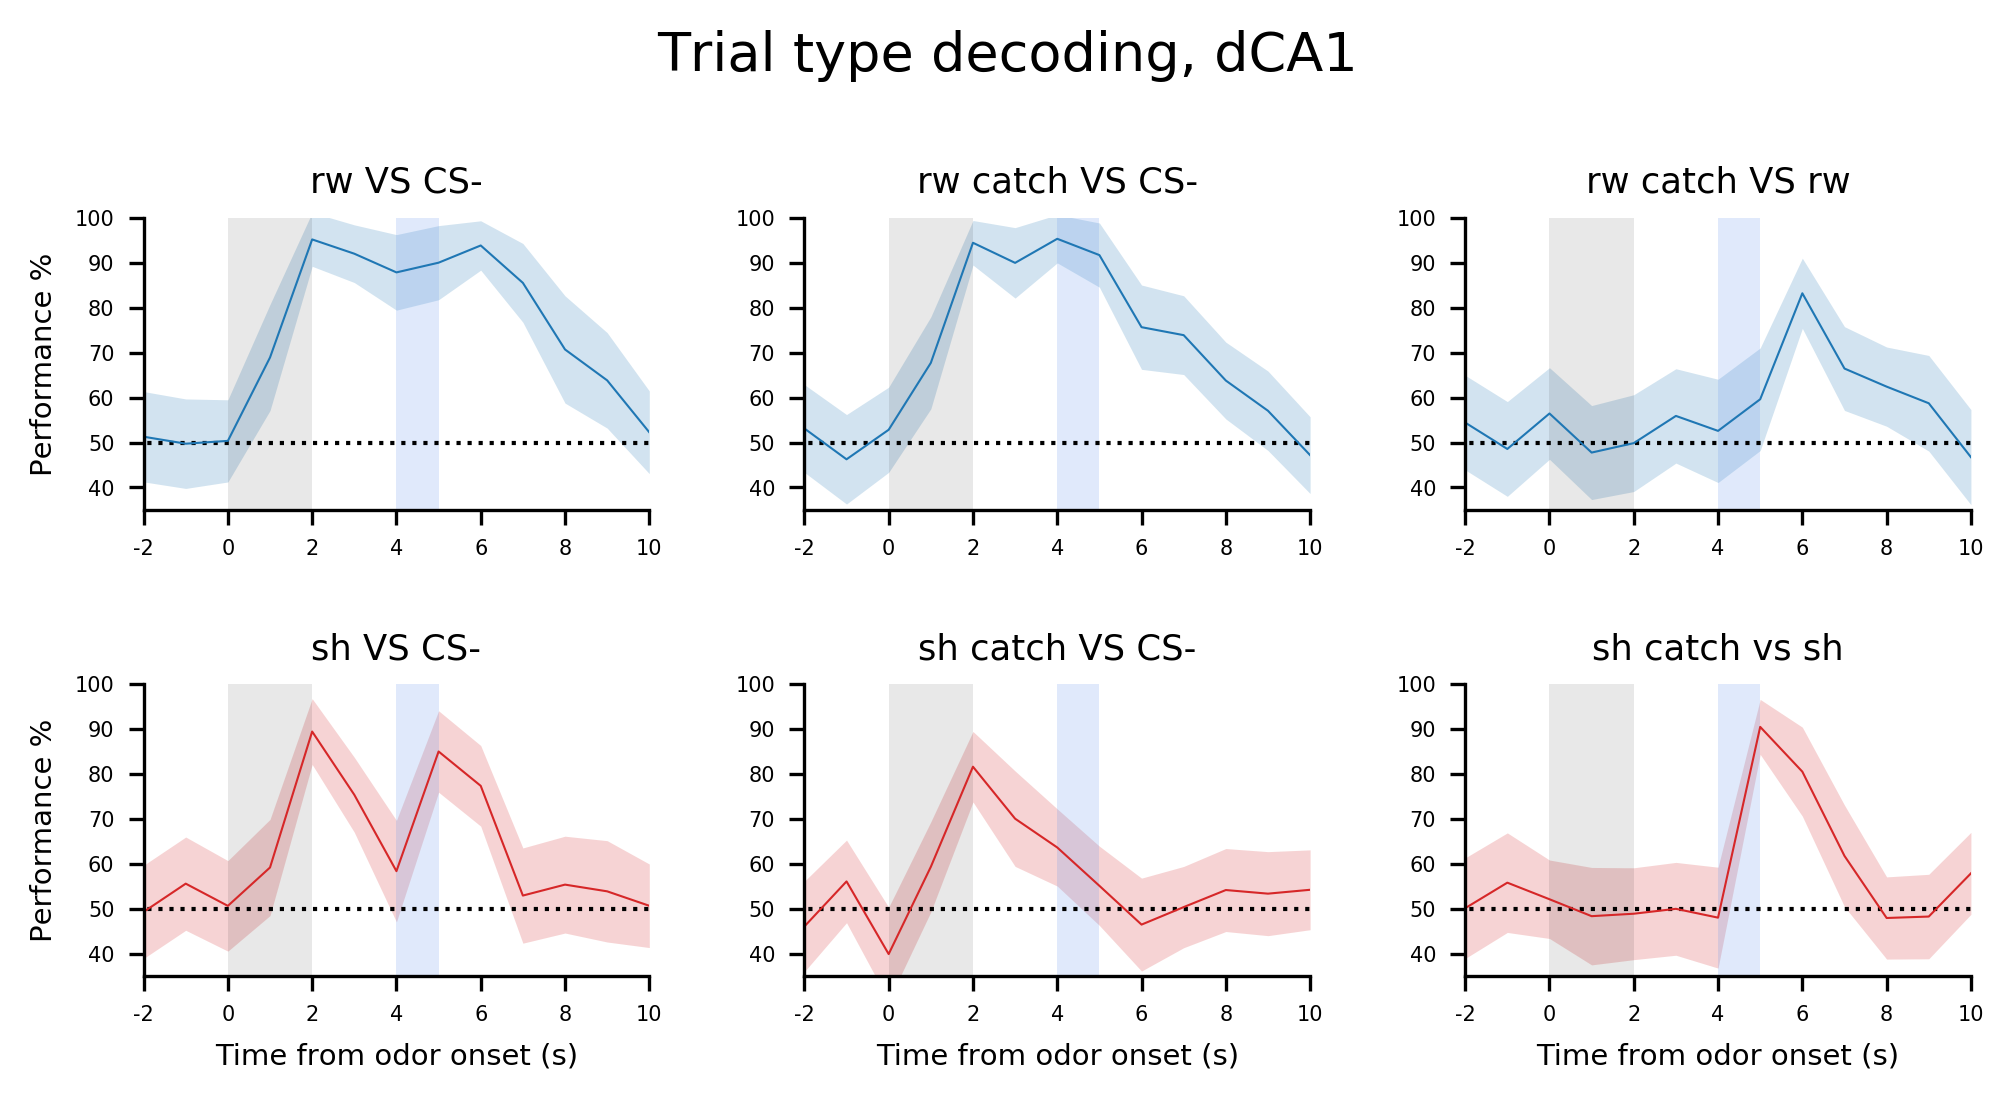

In [52]:
fig, ax = pl.subplots(2,3, figsize=(7, 3.5))

colors =['tab:blue','tab:red']
i=-1
for r in range(2):
    for c in range(3):
        i=i+1
        ax[r][c].plot([(t-2) for t in range(13)], [(np.mean(eval("scores_tb_%s_equal_trials_dhpc['%s']"%(t,all_labels[labels_to_plot[i]])))*100) for t in range(13)], color=colors[r], ls='-',lw=.5 ,ms=1)
        m = np.array([(np.mean(eval("scores_tb_%s_equal_trials_dhpc['%s']"%(t,all_labels[labels_to_plot[i]])))*100) for t in range(13)])
        s = np.array([np.std(eval("scores_tb_%s_equal_trials_dhpc['%s']"%(t,all_labels[labels_to_plot[i]])))*100 for t in range(13)])
        ax[r][c].fill_between([(t-2) for t in range(13)],m-s,m+s,alpha=0.2,color=colors[r],linewidth=0)
        ax[r][c].set_title(labels_to_label[i],fontsize=8.5)
        ax[r][c].set_ylim(35, 100)
        ax[r][c].set_xlim(-2, 10)
        ax[r][c].set_xticks(np.arange(-2,11, 2))
        ax[r][c].set_xticklabels(np.arange(-2,11, 2))
        ax[r][c].hlines(50,-4,11, color='k', lw=1, linestyles='dotted')
        ax[1][c].set_xlabel('Time from odor onset (s)')
        ax[r][0].set_ylabel('Performance %')
        pt.plot_period_bar(ax[r][c], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[r][c], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
        #ax[r][c].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
pl.suptitle('Trial type decoding, dCA1',y=1.06,fontsize=13)

fig.tight_layout(pad=3.5)
print 'trials = 45 sh, 45 rw, 15 sh catch, 15 rw catch, 20 CS-'

#fig.savefig('../img/%s_just_catch_equal_trials.jpg'%NOTEBOOK_NAME)

trials = 45 sh, 45 rw, 15 sh catch, 15 rw catch, 20 CS-


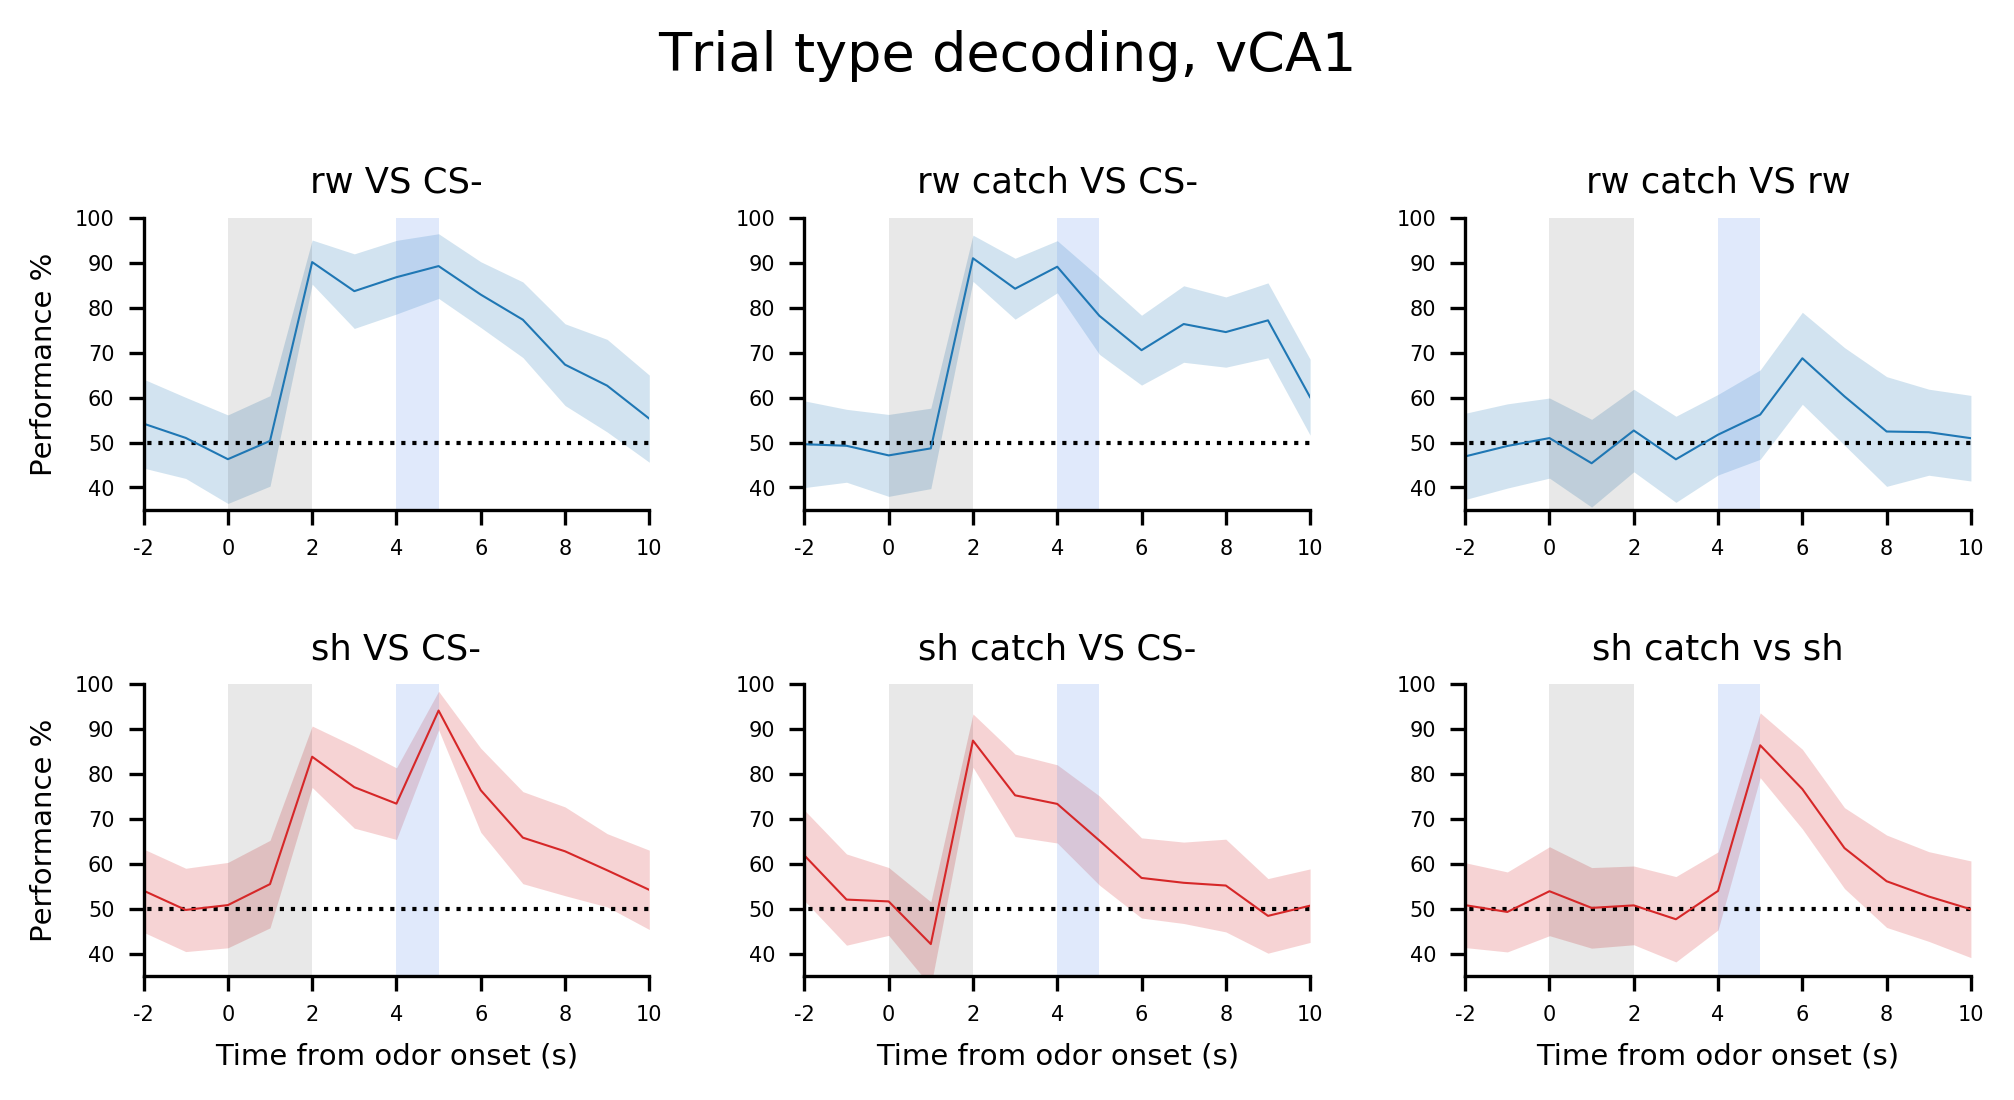

In [53]:
fig, ax = pl.subplots(2,3, figsize=(7, 3.5))

colors =['tab:blue','tab:red']
i=-1
for r in range(2):
    for c in range(3):
        i=i+1
        ax[r][c].plot([(t-2) for t in range(13)], [(np.mean(eval("scores_tb_%s_equal_trials_vhpc['%s']"%(t,all_labels[labels_to_plot[i]])))*100) for t in range(13)], color=colors[r], ls='-',lw=.5 ,ms=1)
        m = np.array([(np.mean(eval("scores_tb_%s_equal_trials_vhpc['%s']"%(t,all_labels[labels_to_plot[i]])))*100) for t in range(13)])
        s = np.array([np.std(eval("scores_tb_%s_equal_trials_vhpc['%s']"%(t,all_labels[labels_to_plot[i]])))*100 for t in range(13)])
        ax[r][c].fill_between([(t-2) for t in range(13)],m-s,m+s,alpha=0.2,color=colors[r],linewidth=0)
        ax[r][c].set_title(labels_to_label[i],fontsize=8.5)
        ax[r][c].set_ylim(35, 100)
        ax[r][c].set_xlim(-2, 10)
        ax[r][c].set_xticks(np.arange(-2,11, 2))
        ax[r][c].set_xticklabels(np.arange(-2,11, 2))
        ax[r][c].hlines(50,-4,11, color='k', lw=1, linestyles='dotted')
        ax[1][c].set_xlabel('Time from odor onset (s)')
        ax[r][0].set_ylabel('Performance %')
        pt.plot_period_bar(ax[r][c], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[r][c], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
        #ax[r][c].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
pl.suptitle('Trial type decoding, vCA1',y=1.06,fontsize=13)

fig.tight_layout(pad=3.5)
print 'trials = 45 sh, 45 rw, 15 sh catch, 15 rw catch, 20 CS-'

#fig.savefig('../img/%s_just_catch_equal_trials.jpg'%NOTEBOOK_NAME)

trials = 45 sh, 45 rw, 15 sh catch, 15 rw catch, 20 CS-


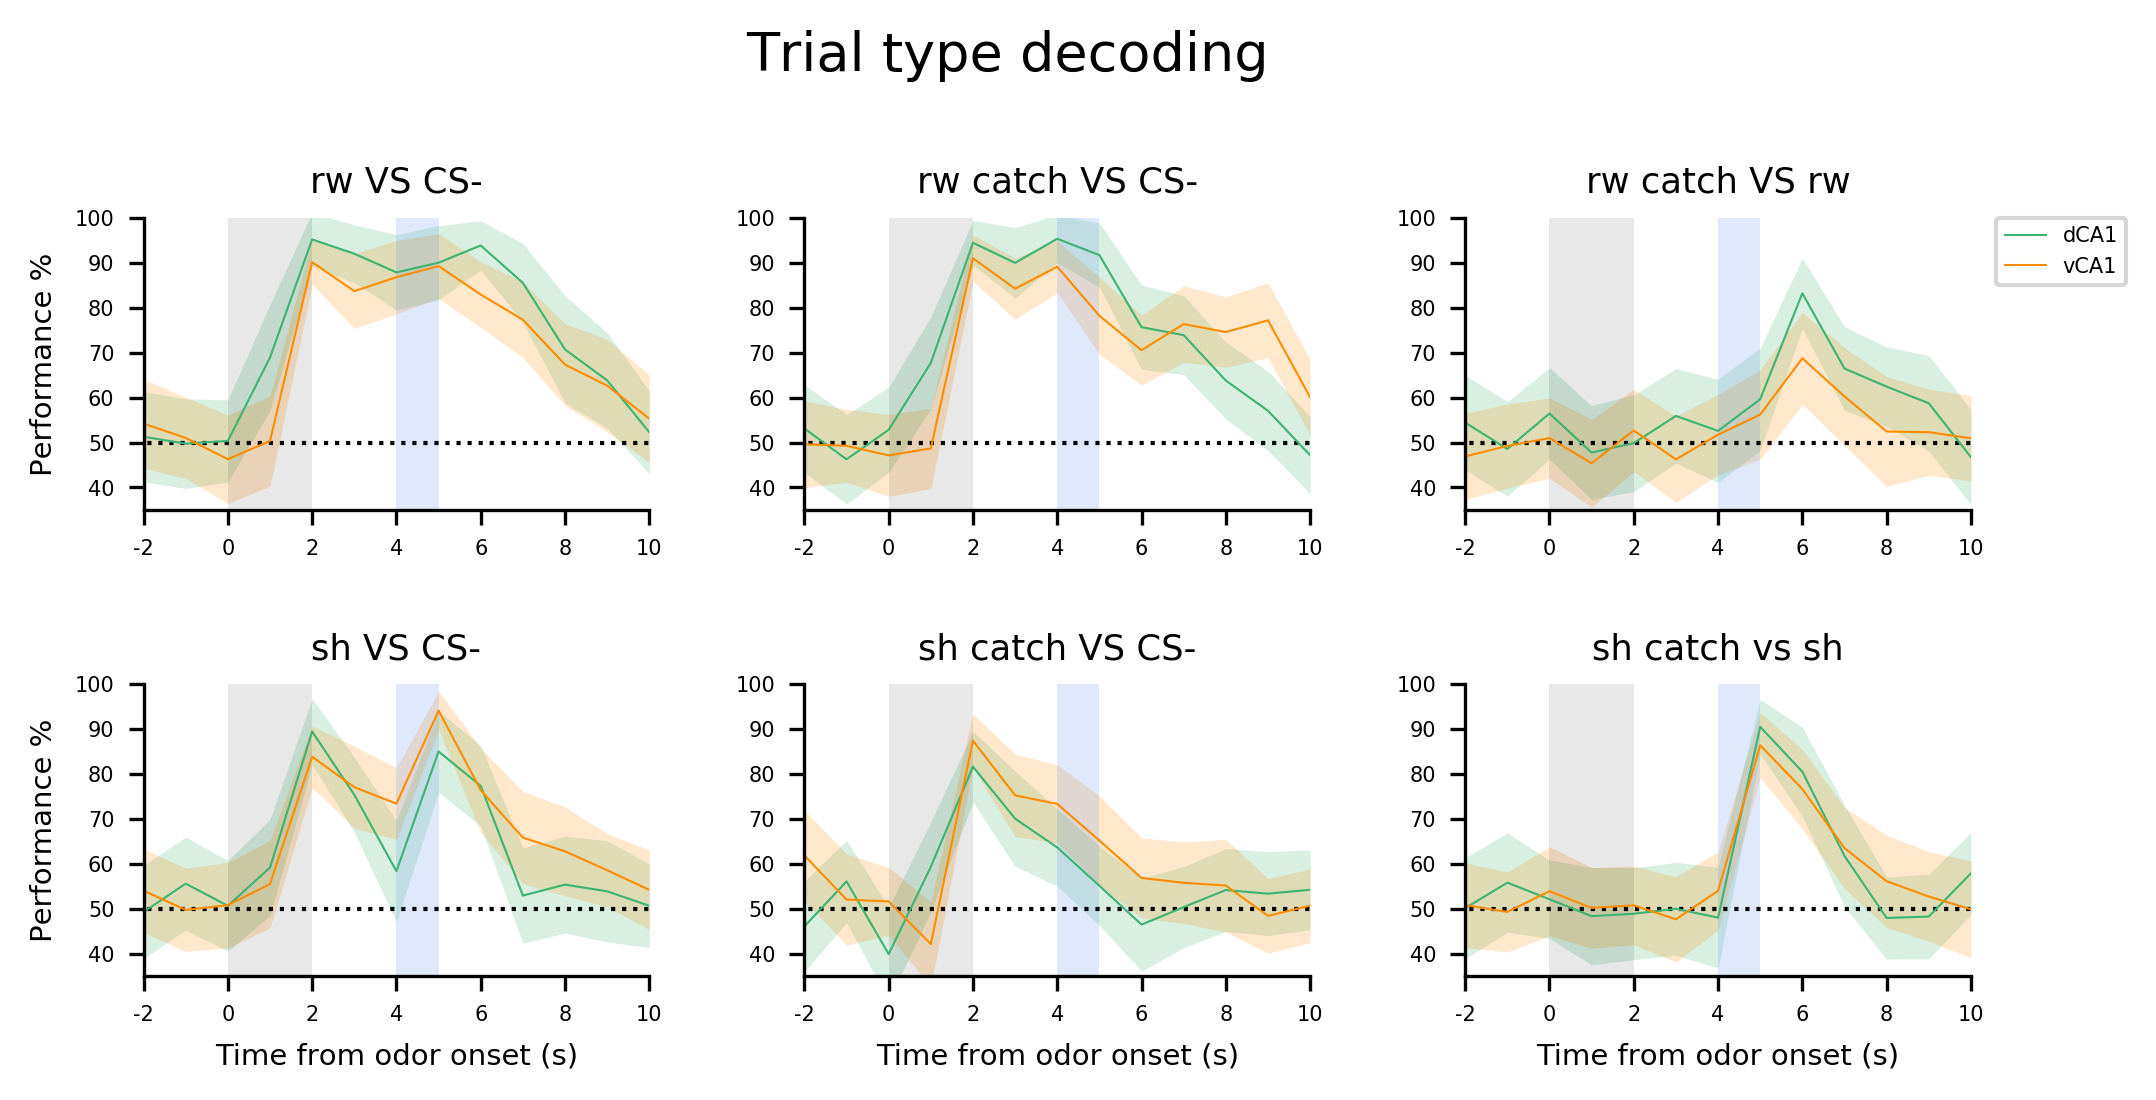

In [61]:
fig, ax = pl.subplots(2,3, figsize=(7, 3.5))

colors =['mediumseagreen','darkorange']
i=-1
for r in range(2):
    for c in range(3):
        i=i+1
        for x,reg,r_la in zip(range(2),['dhpc','vhpc'],['dCA1','vCA1']):
            ax[r][c].plot([(t-2) for t in range(13)], [(np.mean(eval("scores_tb_%s_equal_trials_%s['%s']"%(t,reg,all_labels[labels_to_plot[i]])))*100) for t in range(13)],
                          color=colors[x], ls='-',lw=.5 ,ms=1, label=r_la)
            m = np.array([(np.mean(eval("scores_tb_%s_equal_trials_%s['%s']"%(t,reg,all_labels[labels_to_plot[i]])))*100) for t in range(13)])
            s = np.array([np.std(eval("scores_tb_%s_equal_trials_%s['%s']"%(t,reg,all_labels[labels_to_plot[i]])))*100 for t in range(13)])
            ax[r][c].fill_between([(t-2) for t in range(13)],m-s,m+s,alpha=0.2,color=colors[x],linewidth=0)
        ax[r][c].set_title(labels_to_label[i],fontsize=8.5)
        ax[r][c].set_ylim(35, 100)
        ax[r][c].set_xlim(-2, 10)
        ax[r][c].set_xticks(np.arange(-2,11, 2))
        ax[r][c].set_xticklabels(np.arange(-2,11, 2))
        ax[r][c].hlines(50,-4,11, color='k', lw=1, linestyles='dotted')
        ax[1][c].set_xlabel('Time from odor onset (s)')
        ax[r][0].set_ylabel('Performance %')
        pt.plot_period_bar(ax[r][c], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[r][c], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
        #ax[r][c].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax[0][2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle('Trial type decoding',y=1.06,fontsize=13)

fig.tight_layout(pad=3.5)
print 'trials = 45 sh, 45 rw, 15 sh catch, 15 rw catch, 20 CS-'

fig.savefig('../figures/%s_just_catch_equal_trials_dv.pdf'%NOTEBOOK_NAME)

In [58]:
save_workspace(db)

Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
